In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Import datasets for cleaning

In [2]:
#school_master dataset
school_master = pd.read_csv("Masterlist of Schools.csv")
school_master

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,101746.0,"Brgy. Dias Bautista, Pang",1/1/1930,Elementary,DepED Managed,Elementary,Monograde,P 25 M or more but less than P 35 M,NaN,Partially Urban
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,102193.0,A.G. Tupaz,1/1/1944,Elementary,DepED Managed,Kinder & Elementary,Monograde,P 240 M or more but less than P 320 M,Component City,Partially Urban
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,101283.0,-,1/1/1945,Elementary,DepED Managed,Elementary,Monograde,P 55 M or more,NaN,Partially Urban
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,100216.0,Sucsuquen,1/1/1964,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,100043.0,None,1/1/1979,Elementary,DepED Managed,Elementary,Monograde,P 25 M or more but less than P 35 M,NaN,Partially Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46598,305308,Valeriano E. Fugoso Memorial High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAMPALOC,Sampaloc V,4th District,...,305308.0,"Boys Town Complex, Parang, Marikina City",1/1/1947,Secondary,DepED Managed,Secondary,Monograde,NaN,Highly Urbanized City,Urban
46599,320402,Vicente Trinidad NHS (Punturin NHS),NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,1st District,...,320402.0,"Ruby st., Sta. Lucia Village Phase V",1/1/2003,Secondary,DepED Managed,Secondary,Monograde,P 400 M or more,Highly Urbanized City,Urban
46600,305315,Victoriano Mapa High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAN MIGUEL,Sta. Cruz V,6th District,...,305315.0,"300 San Rafael St., San Miguel,",1/1/1923,Secondary,DepED Managed,Secondary,Monograde,NaN,Highly Urbanized City,Urban
46601,320407,Wawangpulo National High School,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City North District,1st District,...,320407.0,F. Andaya St.,1/1/2008,Secondary,DepED Managed,Secondary,Monograde,P 400 M or more,Highly Urbanized City,Urban


In [3]:
#mooe dataset
mooe = pd.read_csv("MOOE data.csv")
mooe

,school.id,school.name,school.enrollment,school.offering,school.mooe
0,305075,Abra HS,2481,Secondary,"2,182,000.00"
1,134966,Agtangao ES,376,Elementary,"227,000.00"
2,134967,Bacsil ES,218,Elementary,"144,000.00"
3,134968,Bangued East CS,443,Elementary,"339,000.00"
4,134969,Bangued North ES,307,Elementary,"178,000.00"
...,...,...,...,...,...
44023,131231,J. Hector Lacson ES,340,Elementary,"180,000.00"
44024,131233,Kalandagan ES,420,Elementary,"248,000.00"
44025,131236,Ma. Z. Bayya ES,481,Elementary,"242,000.00"
44026,131237,New Isabela Central Elementary School,1895,Elementary,"841,000.00"


In [4]:
# rooms dataset
rooms = pd.read_csv("Rooms data.csv")
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46412 entries, 0 to 46411
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School ID                   46412 non-null  int64  
 1   rooms.standard.academic     46412 non-null  int64  
 2   rooms.standard.unused       46412 non-null  int64  
 3   rooms.nonstandard.academic  46408 non-null  float64
 4   rooms.nonstandard.unused    46408 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.8 MB


In [5]:
#check for duplicates
rooms[rooms["School ID"].duplicated(keep=False)]

,School ID,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused


In [6]:
# school_loc dataset
school_loc = pd.read_csv("Schools Location Data.csv", encoding="latin")
school_loc

,School ID,School Name,Region,Province,Municipality,Division,District,Offering,Name of Principal,Enrolment,Latitude,Longitude
0,100001,Apaleng-Libtong ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Jesusa G. Laeno,90,18.253666,120.606180
1,100002,Bacarra CES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Gene A. Reginaldo,456,18.250964,120.608958
2,100003,Buyon ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Imelda C. Ilay,167,18.234599,120.616037
3,100004,Ganagan Elementary School,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Pedestrelyn Aurora R. Acoba,122,18.250014,120.587169
4,100005,Macupit ES,Region I,Ilocos Norte,Bacarra,Ilocos Norte,Bacarra I,ES,Venchito F. Galario,77,18.293994,120.641019
...,...,...,...,...,...,...,...,...,...,...,...,...
46619,320607,Agripino Manalo National HS,NCR,NCR Fourth District,Pateros,Taguig,Pateros,SS,Cecilia G. Maramag,364,14.544392,121.062078
46620,320701,Muntinlupa National HS - NBP Annex,NCR,NCR Fourth District,City of Muntinlupa,Muntinlupa City,Muntinlupa City District I,SS,Rosendo E. Sangalang,2805,14.381522,121.031864
46621,320702,Muntinlupa Business High School - Sucat Annex,NCR,NCR Fourth District,City of Muntinlupa,Muntinlupa City,Muntinlupa City District II,SS,Angelina B. Sagales,1529,14.441553,121.049839
46622,320703,Pedro E. Diaz HS -Lakeview Annex,NCR,NCR Fourth District,City of Muntinlupa,Muntinlupa City,Muntinlupa City District II,SS,Marissa M. Andanza,575,14.391487,121.041695


In [7]:
#teachers dataset
teachers = pd.read_csv("Teachers data.csv")
teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45040 entries, 0 to 45039
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   school.id            45040 non-null  int64
 1   teachers.instructor  45040 non-null  int64
 2   teachers.mobile      45040 non-null  int64
 3   teachers.regular     45040 non-null  int64
 4   teachers.sped        45040 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


In [8]:
#teachers check for duplicate
teachers[teachers["school.id"].duplicated(keep=False)]

,school.id,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped


In [9]:
mooe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44028 entries, 0 to 44027
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school.id          44028 non-null  int64 
 1   school.name        44028 non-null  object
 2   school.enrollment  44028 non-null  int64 
 3   school.offering    44028 non-null  object
 4    school.mooe       44028 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


In [10]:
#check for duplicates
mooe[mooe["school.id"] . duplicated(keep=False)]

,school.id,school.name,school.enrollment,school.offering,school.mooe


In [11]:
mooe[mooe["school.name"].duplicated(keep=False)]

,school.id,school.name,school.enrollment,school.offering,school.mooe
2,134967,Bacsil ES,218,Elementary,"144,000.00"
14,134976,Sinapangan ES,385,Elementary,"220,000.00"
15,218505,Sta. Rosa PS,23,Elementary,"49,000.00"
19,134980,Calaba ES,328,Elementary,"185,000.00"
23,134984,San Antonio ES,173,Elementary,"131,000.00"
...,...,...,...,...,...
44004,131228,San Rafael ES,134,Elementary,"117,000.00"
44005,131229,Tina ES,266,Elementary,"157,000.00"
44008,131223,Buenaflor ES,338,Elementary,"229,000.00"
44012,131227,San Antonio ES,174,Elementary,"122,000.00"


In [12]:
#change the school.mooe from string to float
mooe[' school.mooe '] = mooe[' school.mooe '].str.replace(',','')
mooe[' school.mooe '] = mooe[' school.mooe '].astype('float')
mooe

,school.id,school.name,school.enrollment,school.offering,school.mooe
0,305075,Abra HS,2481,Secondary,2182000.0
1,134966,Agtangao ES,376,Elementary,227000.0
2,134967,Bacsil ES,218,Elementary,144000.0
3,134968,Bangued East CS,443,Elementary,339000.0
4,134969,Bangued North ES,307,Elementary,178000.0
...,...,...,...,...,...
44023,131231,J. Hector Lacson ES,340,Elementary,180000.0
44024,131233,Kalandagan ES,420,Elementary,248000.0
44025,131236,Ma. Z. Bayya ES,481,Elementary,242000.0
44026,131237,New Isabela Central Elementary School,1895,Elementary,841000.0


In [13]:
school_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46603 entries, 0 to 46602
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school.id               46603 non-null  int64  
 1   school.name             46603 non-null  object 
 2   school.region           46603 non-null  object 
 3   school.region.name      46603 non-null  object 
 4   school.province         46603 non-null  object 
 5   school.cityhall         46602 non-null  object 
 6   school.division         46603 non-null  object 
 7   school.citymuni         46603 non-null  object 
 8   school.district         46603 non-null  object 
 9   school.legdistrict      46603 non-null  object 
 10  school.type             46603 non-null  object 
 11  school.abbrev           18167 non-null  object 
 12  school.previousname     42221 non-null  object 
 13  school.mother.id        46596 non-null  float64
 14  school.address          44621 non-null

In [14]:
#Drop duplicates but there are no duplicates
school_master= school_master.drop_duplicates()
school_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46603 entries, 0 to 46602
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school.id               46603 non-null  int64  
 1   school.name             46603 non-null  object 
 2   school.region           46603 non-null  object 
 3   school.region.name      46603 non-null  object 
 4   school.province         46603 non-null  object 
 5   school.cityhall         46602 non-null  object 
 6   school.division         46603 non-null  object 
 7   school.citymuni         46603 non-null  object 
 8   school.district         46603 non-null  object 
 9   school.legdistrict      46603 non-null  object 
 10  school.type             46603 non-null  object 
 11  school.abbrev           18167 non-null  object 
 12  school.previousname     42221 non-null  object 
 13  school.mother.id        46596 non-null  float64
 14  school.address          44621 non-null

In [15]:
#opening shape file
shapefile = gpd.read_file('./PH Provinces Shapefile/Provinces.shp')
shapefile.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949..."
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509..."
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211..."
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [16]:
print('schools df:\n', sorted(school_master["school.province"].unique()), '\n')
print('shapefile df:\n', sorted(shapefile["PROVINCE"].unique()))

schools df:
 ['ABRA', 'AGUSAN DEL NORTE', 'AGUSAN DEL SUR', 'AKLAN', 'ALBAY', 'ANTIQUE', 'APAYAO', 'AURORA', 'BASILAN', 'BATAAN', 'BATANES', 'BATANGAS', 'BENGUET', 'BILIRAN', 'BOHOL', 'BUKIDNON', 'BULACAN', 'CAGAYAN', 'CAMARINES NORTE', 'CAMARINES SUR', 'CAMIGUIN', 'CAPIZ', 'CATANDUANES', 'CAVITE', 'CEBU', 'CITY OF COTABATO', 'CITY OF ISABELA', 'COMPOSTELA VALLEY', 'DAVAO DEL NORTE', 'DAVAO DEL SUR', 'DAVAO ORIENTAL', 'DINAGAT ISLANDS', 'EASTERN SAMAR', 'GUIMARAS', 'IFUGAO', 'ILOCOS NORTE', 'ILOCOS SUR', 'ILOILO', 'ISABELA', 'KALINGA', 'LA UNION', 'LAGUNA', 'LANAO DEL NORTE', 'LANAO DEL SUR', 'LEYTE', 'MAGUINDANAO', 'MANILA, NCR, FIRST DISTRICT', 'MARINDUQUE', 'MASBATE', 'MISAMIS OCCIDENTAL', 'MISAMIS ORIENTAL', 'MOUNTAIN PROVINCE', 'NCR FOURTH DISTRICT', 'NCR SECOND DISTRICT', 'NCR THIRD DISTRICT', 'NEGROS OCCIDENTAL', 'NEGROS ORIENTAL', 'NORTH COTABATO', 'NORTHERN SAMAR', 'NUEVA ECIJA', 'NUEVA VIZCAYA', 'OCCIDENTAL MINDORO', 'ORIENTAL MINDORO', 'PALAWAN', 'PAMPANGA', 'PANGASINAN', 'Q

In [17]:
# Create dictionry of those with discrepancy
province_dic = {'City Of Cotabato':'Maguindanao',
 'Manila, Ncr, First District':"Metropolitan Manila",
 'Ncr Fourth District':"Metropolitan Manila",
 'Ncr Second District':"Metropolitan Manila",
 'Ncr Third District':"Metropolitan Manila",
 'Western Sama':"Samar",
 'City Of Isabela':"Basilan"}

In [18]:
# Replace province name
school_master["school.province"] = school_master["school.province"].str.title().replace(province_dic).str.replace("Del", 'del')
print(sorted(school_master["school.province"].unique()))

['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes', 'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan', 'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz', 'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley', 'Davao Oriental', 'Davao del Norte', 'Davao del Sur', 'Dinagat Islands', 'Eastern Samar', 'Guimaras', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga', 'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte', 'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila', 'Misamis Occidental', 'Misamis Oriental', 'Mountain Province', 'Negros Occidental', 'Negros Oriental', 'North Cotabato', 'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga', 'Pangasinan', 'Quezon', 'Quirino', 'Rizal', 'Romblon', 'Sarangani', 'Siquijor', 'Sorsogon', 'South Cotabato', 'Southern Leyte', 'Sultan Kudarat'

### Merging Dataframes

In [19]:
school_merged = pd.merge(school_master, mooe, on="school.id")
school_merged.shape

(44025, 27)

In [20]:
school_merged2=school_merged.merge(rooms, left_on= "school.id", right_on = "School ID", how="left")
school_merged2.shape

(44025, 32)

In [21]:
school_merged3=school_merged2.merge(teachers, left_on= "school.id", right_on = "school.id", how="left")
school_merged3.shape

(44025, 36)

In [22]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44025 entries, 0 to 44024
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   44025 non-null  int64  
 1   school.name_x               44025 non-null  object 
 2   school.region               44025 non-null  object 
 3   school.region.name          44025 non-null  object 
 4   school.province             44025 non-null  object 
 5   school.cityhall             44024 non-null  object 
 6   school.division             44025 non-null  object 
 7   school.citymuni             44025 non-null  object 
 8   school.district             44025 non-null  object 
 9   school.legdistrict          44025 non-null  object 
 10  school.type                 44025 non-null  object 
 11  school.abbrev               17461 non-null  object 
 12  school.previousname         39810 non-null  object 
 13  school.mother.id            440

### Creating features

In [23]:
school_merged3['teacher.student']=school_merged3['teachers.regular']/school_merged['school.enrollment']

In [24]:
school_merged3['rooms.student']=school_merged3['rooms.standard.academic']/school_merged['school.enrollment']

In [25]:
school_merged3['mooe.student']=school_merged3[' school.mooe ']/school_merged['school.enrollment']

In [26]:
school_merged3['teacher.mooe']=school_merged3['teachers.regular']/school_merged[' school.mooe ']

In [27]:
school_merged3['rooms.mooe']=school_merged3['rooms.standard.academic']/school_merged[' school.mooe ']

In [28]:
school_merged3['student.mooe']= school_merged3['school.enrollment']/school_merged[' school.mooe ']

In [29]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44025 entries, 0 to 44024
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   44025 non-null  int64  
 1   school.name_x               44025 non-null  object 
 2   school.region               44025 non-null  object 
 3   school.region.name          44025 non-null  object 
 4   school.province             44025 non-null  object 
 5   school.cityhall             44024 non-null  object 
 6   school.division             44025 non-null  object 
 7   school.citymuni             44025 non-null  object 
 8   school.district             44025 non-null  object 
 9   school.legdistrict          44025 non-null  object 
 10  school.type                 44025 non-null  object 
 11  school.abbrev               17461 non-null  object 
 12  school.previousname         39810 non-null  object 
 13  school.mother.id            440

### Cleaning new features

In [30]:
cols = school_merged3.columns

In [31]:
school_merged3[ school_merged3[cols[36]] == np.inf].index

Int64Index([28989, 33740], dtype='int64')

In [32]:
# drop rows with 0 students

school_merged3.drop( school_merged3[ school_merged3[cols[36]] == np.inf].index , inplace=True) # 2 rows dropped

In [33]:
school_merged3[ school_merged3[cols[36]] == np.inf]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe,student.mooe


In [34]:
school_merged3[ school_merged3[cols[37]] == np.inf]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe,student.mooe


In [35]:
school_merged3[ school_merged3[cols[38]] == np.inf]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe,student.mooe


In [36]:
school_merged3[ school_merged3[cols[38]] == np.inf]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe,student.mooe


In [37]:
school_merged3[ school_merged3[cols[40]] == np.inf]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe,student.mooe


In [38]:
school_merged3[ school_merged3[cols[41]] == np.inf]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe,student.mooe


In [39]:
school_merged3.describe()

,school.id,school.mother.id,school.enrollment,school.mooe,School ID,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe,student.mooe
count,44023.000000,44016.000000,44023.000000,4.402300e+04,43804.000000,43804.000000,43804.000000,43800.000000,43800.000000,42521.000000,42521.000000,42521.000000,42521.000000,42521.000000,43804.000000,44023.000000,42521.000000,43804.000000,44023.000000
mean,153170.502669,152694.474782,458.245417,3.050145e+05,152555.472035,8.987079,0.150352,0.231598,0.003333,0.002516,1.004257,11.354954,0.048188,0.028053,0.026150,844.828937,0.000037,0.000034,0.001452
std,71946.952543,71534.290477,699.275000,4.851033e+05,71460.304770,9.964825,0.700201,1.120073,0.081862,0.106991,2.657460,17.459518,0.743461,0.015076,0.015278,634.701197,0.000012,0.000014,0.000542
min,100001.000000,100001.000000,3.000000,4.200000e+04,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172.376874,0.000000,0.000000,0.000025
25%,111119.500000,111017.750000,144.000000,1.160000e+05,111061.750000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.020513,0.018315,540.242061,0.000029,0.000023,0.001034
50%,122237.000000,122111.500000,249.000000,1.610000e+05,122130.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.025532,0.023873,689.984102,0.000038,0.000037,0.001449
75%,135481.500000,135308.250000,469.000000,2.920000e+05,135306.250000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.032609,0.031056,966.961640,0.000046,0.000045,0.001851
max,356059.000000,325902.000000,12613.000000,1.121800e+07,356059.000000,187.000000,15.000000,74.000000,7.000000,10.000000,104.000000,472.000000,89.000000,1.142857,0.714286,39857.142857,0.000257,0.000130,0.005801


Looking at the features that was made by getting the variables, it was shown that the value is very small, therefore it was decided to get the inverse of the values to get a more intuitive value.

In [40]:
school_merged3.drop( labels='student.mooe' , axis=1, inplace=True)

In [41]:
school_merged3['teacher.student'] = (school_merged3['teacher.student'])**-1

In [42]:
school_merged3['rooms.student'] = (school_merged3['rooms.student'])**-1

In [43]:
school_merged3['teacher.mooe'] = (school_merged3['teacher.mooe'])**-1

In [44]:
school_merged3['rooms.mooe'] = (school_merged3['rooms.mooe'])**-1

In [45]:
school_merged3.describe()

,school.id,school.mother.id,school.enrollment,school.mooe,School ID,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe
count,44023.000000,44016.000000,44023.000000,4.402300e+04,43804.000000,43804.000000,43804.000000,43800.000000,43800.000000,42521.000000,42521.000000,42521.000000,42521.000000,4.252100e+04,4.380400e+04,44023.000000,4.252100e+04,4.380400e+04
mean,153170.502669,152694.474782,458.245417,3.050145e+05,152555.472035,8.987079,0.150352,0.231598,0.003333,0.002516,1.004257,11.354954,0.048188,inf,inf,844.828937,inf,inf
std,71946.952543,71534.290477,699.275000,4.851033e+05,71460.304770,9.964825,0.700201,1.120073,0.081862,0.106991,2.657460,17.459518,0.743461,NaN,NaN,634.701197,NaN,NaN
min,100001.000000,100001.000000,3.000000,4.200000e+04,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.750000e-01,1.400000e+00,172.376874,3.888889e+03,7.710526e+03
25%,111119.500000,111017.750000,144.000000,1.160000e+05,111061.750000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.066667e+01,3.220000e+01,540.242061,2.188889e+04,2.216667e+04
50%,122237.000000,122111.500000,249.000000,1.610000e+05,122130.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.916667e+01,4.188889e+01,689.984102,2.600000e+04,2.687500e+04
75%,135481.500000,135308.250000,469.000000,2.920000e+05,135306.250000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,4.875000e+01,5.460000e+01,966.961640,3.433333e+04,4.383333e+04
max,356059.000000,325902.000000,12613.000000,1.121800e+07,356059.000000,187.000000,15.000000,74.000000,7.000000,10.000000,104.000000,472.000000,89.000000,inf,inf,39857.142857,inf,inf


Looking at the data dere are some missing values or were divided by 0. This would need to be removed

In [46]:
cols = school_merged3.columns
cols

Index(['school.id', 'school.name_x', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'school.enrollment', 'school.offering', ' school.mooe ', 'School ID',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'teacher.student', 'rooms.student', 'mooe.student',
       'teacher.mooe', 'rooms.mooe'],
      dtype='object')

In [47]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44023 entries, 0 to 44024
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   44023 non-null  int64  
 1   school.name_x               44023 non-null  object 
 2   school.region               44023 non-null  object 
 3   school.region.name          44023 non-null  object 
 4   school.province             44023 non-null  object 
 5   school.cityhall             44022 non-null  object 
 6   school.division             44023 non-null  object 
 7   school.citymuni             44023 non-null  object 
 8   school.district             44023 non-null  object 
 9   school.legdistrict          44023 non-null  object 
 10  school.type                 44023 non-null  object 
 11  school.abbrev               17461 non-null  object 
 12  school.previousname         39808 non-null  object 
 13  school.mother.id            440

In [48]:
school_merged3[ school_merged3[cols[36]] == np.inf ]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe
263,100464,Bangaan PS,Region I,Ilocos Region,Ilocos Sur,ILOCOS SUR,Ilocos Sur,CERVANTES,Cervantes-Quirino,2nd District,...,0.0,0.0,0.0,0.0,0.0,inf,16.000000,3125.000000,inf,5.000000e+04
279,150519,Banoen PS,Region I,Ilocos Region,Ilocos Sur,ILOCOS SUR,Ilocos Sur,QUIRINO (ANGKAKI),Cervantes-Quirino,2nd District,...,0.0,0.0,0.0,0.0,0.0,inf,11.000000,4181.818182,inf,4.600000e+04
414,150520,Bito PS,Region I,Ilocos Region,Ilocos Sur,ILOCOS SUR,Ilocos Sur,SUYO,Suyo,2nd District,...,0.0,0.0,0.0,0.0,0.0,inf,inf,1696.969697,inf,inf
972,151009,EULOGIO CLARENCE M. DE GUZMAN Jr. ELEMENTARY S...,Region I,Ilocos Region,La Union,LA UNION,La Union,BAUANG,Bauang North,2nd District,...,NaN,0.0,0.0,0.0,0.0,inf,NaN,370.786517,inf,NaN
1409,101466,Maya PS,Region I,Ilocos Region,Pangasinan,PANGASINAN,"Pangasinan I, Lingayen",INFANTA,Infanta,1st District,...,0.0,0.0,1.0,0.0,0.0,inf,24.500000,1265.306122,inf,3.100000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43775,319806,Addition Hills Integrated School,NCR,National Capital Region,Metropolitan Manila,CITY OF MANDALUYONG,Mandaluyong City,CITY OF MANDALUYONG,Mandaluyong City District II,Lone District,...,NaN,0.0,0.0,0.0,0.0,inf,NaN,4860.267315,inf,NaN
43804,319711,Caloocan National Science and Technology High ...,NCR,National Capital Region,Metropolitan Manila,KALOOKAN CITY,Caloocan City,KALOOKAN CITY,Caloocan North IV,1st District,...,0.0,0.0,0.0,0.0,0.0,inf,86.000000,776.162791,inf,6.675000e+04
43815,320505,Catmon IS,NCR,National Capital Region,Metropolitan Manila,CITY OF MALABON,Malabon City,CITY OF MALABON,Malabon District V,Lone District,...,0.0,0.0,0.0,0.0,0.0,inf,246.000000,653.116531,inf,1.606667e+05
44000,320305,T. S. Cruz High School,NCR,National Capital Region,Metropolitan Manila,CITY OF LAS PIÑAS,Las Piñas City,CITY OF LAS PIÑAS,Las Piñas City II,Lone District,...,0.0,0.0,0.0,0.0,0.0,inf,100.176471,898.414563,inf,9.000000e+04


In [49]:
# drop rows with 0 teachers

school_merged3.drop( school_merged3[ school_merged3[cols[36]] == np.inf].index , inplace=True) # 695 rows dropped

In [50]:
school_merged3[ school_merged3[cols[36]] == np.inf ]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe


In [51]:
school_merged3[ school_merged3[cols[37]] == np.inf ]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe
213,101492,Balangobong Elementary School,Region I,Ilocos Region,Pangasinan,PANGASINAN,"Pangasinan I, Lingayen",LINGAYEN (Capital),Lingayen II,2nd District,...,0.0,0.0,1.0,7.0,0.0,26.857143,inf,776.595745,20857.142857,inf
676,235501,Candon South Central School SPED Center,Region I,Ilocos Region,Ilocos Sur,ILOCOS SUR,Candon City,CITY OF CANDON,District II,2nd District,...,0.0,0.0,0.0,1.0,2.0,58.000000,inf,1137.931034,66000.000000,inf
919,102057,Doña Aurea ES,Region I,Ilocos Region,Pangasinan,PANGASINAN,"Pangasinan II, Binalonan",SANTO TOMAS,Sto. Tomas,5th District,...,0.0,0.0,2.0,12.0,0.0,41.583333,inf,486.973948,20250.000000,inf
1088,153507,Jose Macam Paningbatan Sr. Elementary School,Region I,Ilocos Region,Pangasinan,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District II,3rd District,...,0.0,0.0,0.0,5.0,0.0,70.600000,inf,495.750708,35000.000000,inf
1091,101449,Juan Bustamante ES,Region I,Ilocos Region,Pangasinan,PANGASINAN,"Pangasinan I, Lingayen",DASOL,Dasol,1st District,...,0.0,0.0,0.0,3.0,0.0,40.666667,inf,852.459016,34666.666667,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43772,319008,Ubao NHS Extension,CAR,Cordillera Administrative Region,Ifugao,IFUGAO,Ifugao,AGUINALDO,Aguinaldo,Lone District,...,0.0,NaN,NaN,NaN,NaN,NaN,inf,1481.751825,NaN,inf
43776,320607,Agripino Manalo National HS,NCR,National Capital Region,Metropolitan Manila,PATEROS,Taguig,PATEROS,Pateros,1st District,...,0.0,0.0,0.0,11.0,0.0,33.090909,inf,1192.307692,39454.545455,inf
43794,319903,Barangka NHS,NCR,National Capital Region,Metropolitan Manila,CITY OF MARIKINA,Marikina City,CITY OF MARIKINA,Marikina City District I,1st District,...,0.0,0.0,0.0,18.0,0.0,51.722222,inf,881.847476,45611.111111,inf
43872,319904,Kalumpang National High School,NCR,National Capital Region,Metropolitan Manila,CITY OF MARIKINA,Marikina City,CITY OF MARIKINA,Marikina City District I,1st District,...,0.0,0.0,0.0,16.0,0.0,50.750000,inf,853.448276,43312.500000,inf


In [52]:
# drop rows with 0 rooms

school_merged3.drop( school_merged3[ school_merged3[cols[37]] == np.inf].index , inplace=True) # 664 rows dropped

In [53]:
school_merged3[ school_merged3[cols[37]] == np.inf ]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe


In [54]:
school_merged3[ school_merged3[cols[39]] == np.inf ]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe


In [55]:
school_merged3[ school_merged3[cols[40]] == np.inf ]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe


In [56]:
school_merged3.describe()

,school.id,school.mother.id,school.enrollment,school.mooe,School ID,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,teacher.student,rooms.student,mooe.student,teacher.mooe,rooms.mooe
count,42664.000000,42659.000000,42664.000000,4.266400e+04,42622.000000,42622.000000,42622.000000,42621.000000,42621.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,42622.000000,42664.000000,4.127100e+04,42622.000000
mean,150512.645462,150076.676903,465.996672,3.088861e+05,150382.759232,9.205293,0.152785,0.193778,0.003121,0.002423,1.031184,11.638317,0.047612,40.897139,46.933129,832.162714,3.005212e+04,35041.876532
std,69926.383081,69521.335942,706.725744,4.909382e+05,69812.461049,10.004677,0.705522,1.030308,0.079088,0.102991,2.689942,17.614149,0.743137,19.622948,29.008597,618.473940,1.797678e+04,23503.747415
min,100001.000000,100001.000000,3.000000,4.800000e+04,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.875000,1.400000,172.376874,3.888889e+03,10333.333333
25%,110828.750000,110747.500000,147.000000,1.170000e+05,110818.250000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,30.500000,32.000000,537.669009,2.183333e+04,22000.000000
50%,121678.500000,121562.000000,254.000000,1.620000e+05,121656.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,38.909091,41.428571,683.615819,2.575000e+04,26500.000000
75%,132752.250000,132611.500000,478.000000,2.970000e+05,132719.750000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,48.000000,53.428571,953.256781,3.350000e+04,41142.857143
max,356059.000000,325106.000000,12613.000000,1.121800e+07,356059.000000,187.000000,15.000000,74.000000,7.000000,10.000000,104.000000,472.000000,89.000000,1570.000000,1223.000000,39857.142857,1.385000e+06,991000.000000


In [57]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42664 entries, 0 to 44024
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   42664 non-null  int64  
 1   school.name_x               42664 non-null  object 
 2   school.region               42664 non-null  object 
 3   school.region.name          42664 non-null  object 
 4   school.province             42664 non-null  object 
 5   school.cityhall             42663 non-null  object 
 6   school.division             42664 non-null  object 
 7   school.citymuni             42664 non-null  object 
 8   school.district             42664 non-null  object 
 9   school.legdistrict          42664 non-null  object 
 10  school.type                 42664 non-null  object 
 11  school.abbrev               16879 non-null  object 
 12  school.previousname         38900 non-null  object 
 13  school.mother.id            426

In [58]:
# get the target features
school_merged4 = school_merged3[['school.id','school.classification','school.province', 'teacher.student', 'rooms.student', 'mooe.student', 'teacher.mooe', 'rooms.mooe']]

In [59]:
#check for missing values
school_merged4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42664 entries, 0 to 44024
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school.id              42664 non-null  int64  
 1   school.classification  42664 non-null  object 
 2   school.province        42664 non-null  object 
 3   teacher.student        41271 non-null  float64
 4   rooms.student          42622 non-null  float64
 5   mooe.student           42664 non-null  float64
 6   teacher.mooe           41271 non-null  float64
 7   rooms.mooe             42622 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.9+ MB


In [60]:
#remove missing values
school_merged4 = school_merged4.dropna()

In [61]:
school_merged4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 44024
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school.id              41271 non-null  int64  
 1   school.classification  41271 non-null  object 
 2   school.province        41271 non-null  object 
 3   teacher.student        41271 non-null  float64
 4   rooms.student          41271 non-null  float64
 5   mooe.student           41271 non-null  float64
 6   teacher.mooe           41271 non-null  float64
 7   rooms.mooe             41271 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


Create boxplot to visualize the values

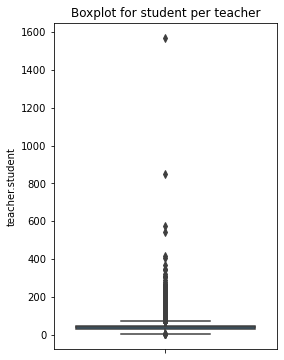

In [62]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["teacher.student"])
plt.title("Boxplot for student per teacher")

plt.show()

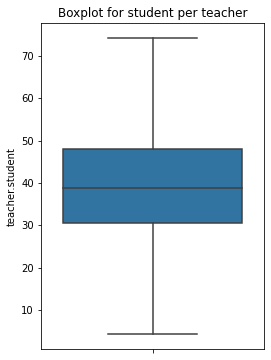

In [63]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["teacher.student"], showfliers=False)
plt.title("Boxplot for student per teacher")

plt.show()

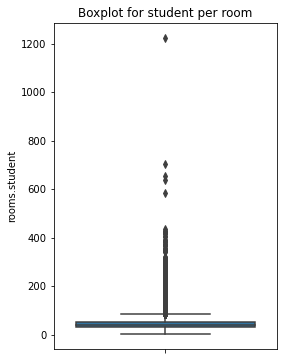

In [64]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["rooms.student"])
plt.title("Boxplot for student per room")

plt.show()

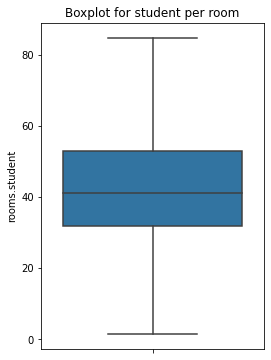

In [65]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["rooms.student"], showfliers=False)
plt.title("Boxplot for student per room")

plt.show()

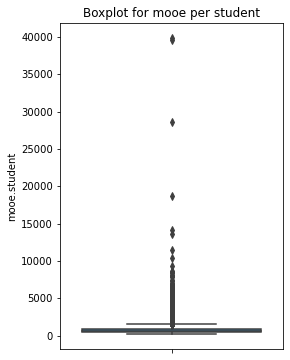

In [66]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["mooe.student"])
plt.title("Boxplot for mooe per student")

plt.show()

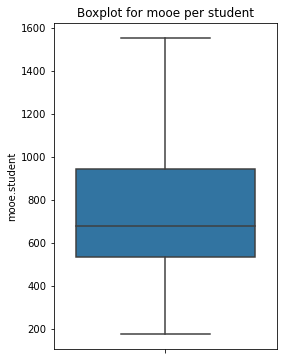

In [67]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["mooe.student"], showfliers=False)
plt.title("Boxplot for mooe per student")

plt.show()

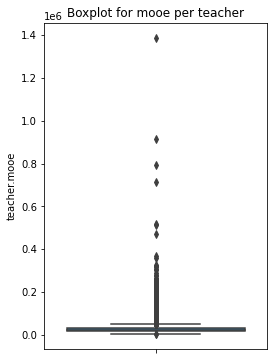

In [68]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["teacher.mooe"])
plt.title("Boxplot for mooe per teacher")

plt.show()

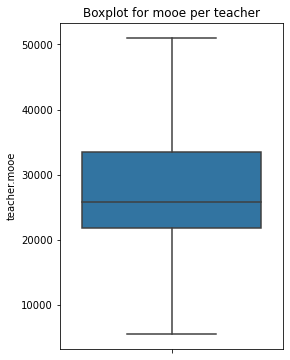

In [69]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["teacher.mooe"], showfliers = False)
plt.title("Boxplot for mooe per teacher")

plt.show()

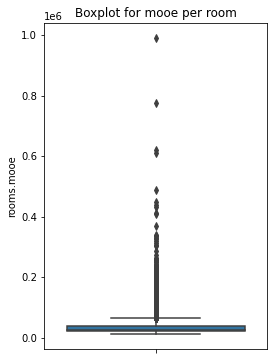

In [70]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["rooms.mooe"])
plt.title("Boxplot for mooe per room")

plt.show()

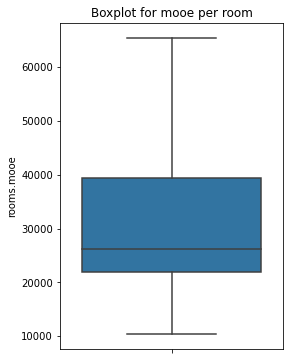

In [71]:
plt.figure(figsize=(4,6))

sns.boxplot(y=school_merged4["rooms.mooe"], showfliers = False)
plt.title("Boxplot for mooe per room")

plt.show()

Additional visualization

In [72]:
# assign colors to school classification
colors = {'Elementary':'red', 'Secondary':'blue'}

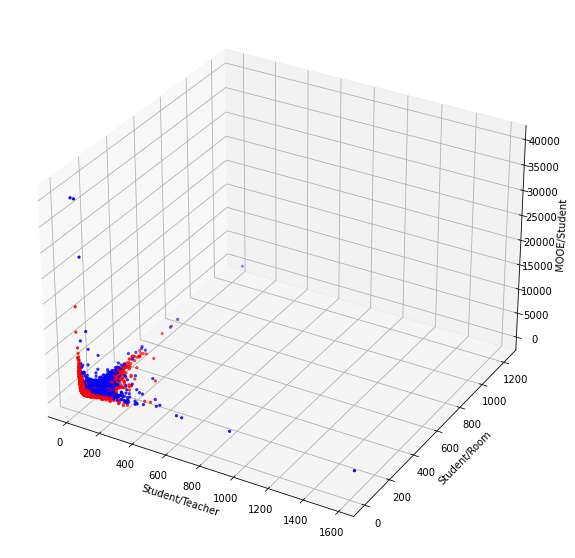

In [73]:
#create a 3d scatter plot for variables: student/teacher, student/room, MOOE/student ratio
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

teacher = school_merged4['teacher.student']
room = school_merged4['rooms.student']
budget = school_merged4['mooe.student']
ax.scatter(teacher, room, budget, s=5, c=school_merged4['school.classification'].map(colors))

ax.set_xlabel('Student/Teacher')
ax.set_ylabel('Student/Room')
ax.set_zlabel('MOOE/Student')

plt.show()

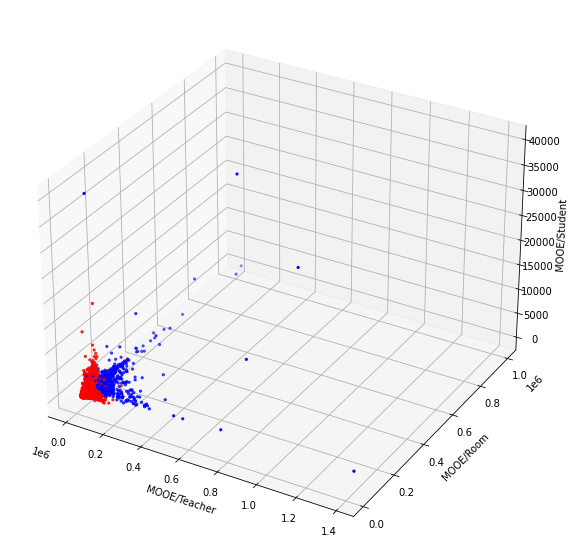

In [74]:
#create a 3d scatter plot for variables: MOOE/teacher, MOOE/room, MOOE/student ratio
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

teacher = school_merged4['teacher.mooe']
room = school_merged4['rooms.mooe']
budget = school_merged4['mooe.student']
ax.scatter(teacher, room, budget, s=5, c=school_merged4['school.classification'].map(colors))

ax.set_xlabel('MOOE/Teacher')
ax.set_ylabel('MOOE/Room')
ax.set_zlabel('MOOE/Student')

plt.show()

<Figure size 720x576 with 0 Axes>

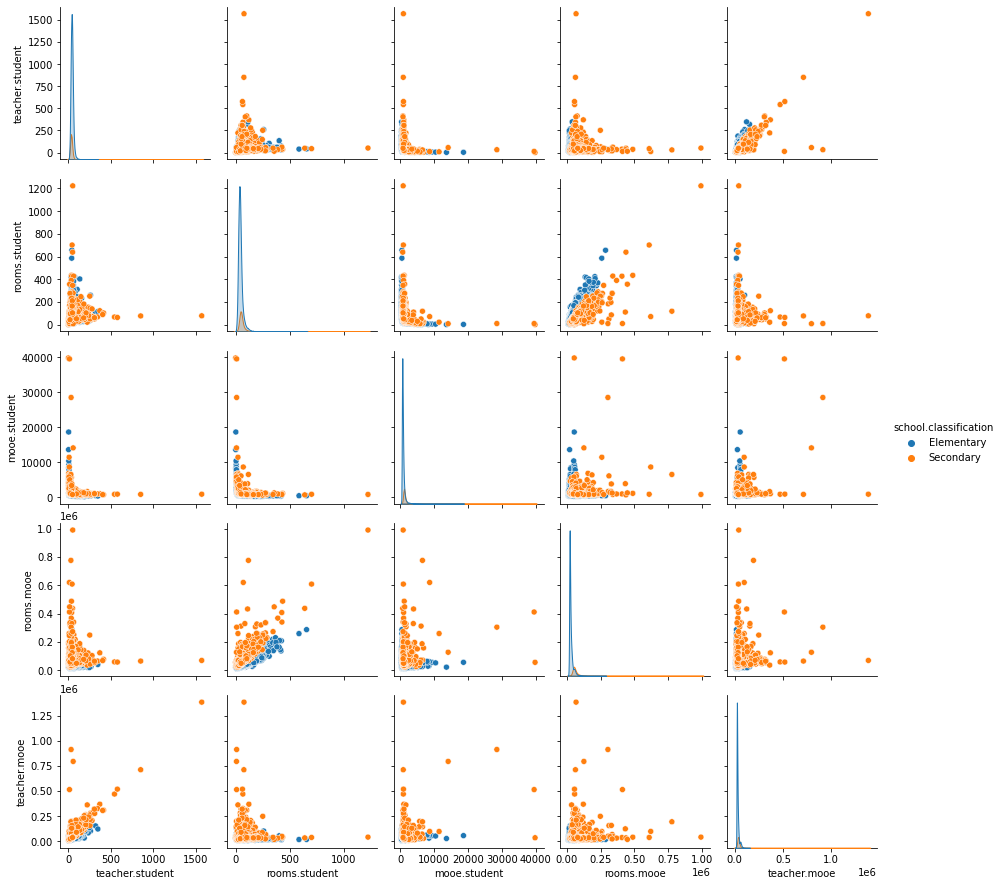

In [75]:
#pairwise scatter plot for the different variables
plt.figure(figsize=(10,8))

sns.pairplot(vars = ['teacher.student', 'rooms.student', 'mooe.student', 'rooms.mooe', 'teacher.mooe'], data = school_merged4, hue='school.classification')

plt.show()

Remove (statisticcal Outlier)


In [76]:
#creating school_merged5 which is a dataset minus the outliers
school_merged5=school_merged4.copy()

In [77]:
# Removing (statistical) outliers for Amount
Q1 = school_merged5['teacher.student'].quantile(0.25)
Q3 = school_merged5['teacher.student'].quantile(0.75)
IQR = Q3 - Q1
school_merged5 = (school_merged5[(school_merged5['teacher.student'] >= Q1 - 1.5*IQR) & 
                           (school_merged5['teacher.student'] <= Q3 + 1.5*IQR)])

In [78]:
# Removing (statistical) outliers for Amount
Q1 = school_merged5['rooms.student'].quantile(0.25)
Q3 = school_merged5['rooms.student'].quantile(0.75)
IQR = Q3 - Q1
school_merged5 = (school_merged5[(school_merged5['rooms.student'] >= Q1 - 1.5*IQR) & 
                           (school_merged5['rooms.student'] <= Q3 + 1.5*IQR)])

In [79]:
# Removing (statistical) outliers for Amount
Q1 = school_merged5['mooe.student'].quantile(0.25)
Q3 = school_merged5['mooe.student'].quantile(0.75)
IQR = Q3 - Q1
schoole_merged5 = (school_merged5[(school_merged5['mooe.student'] >= Q1 - 1.5*IQR) & 
                           (school_merged5['mooe.student'] <= Q3 + 1.5*IQR)])

In [80]:
# Removing (statistical) outliers for Amount
Q1 = school_merged5['rooms.mooe'].quantile(0.25)
Q3 = school_merged5['rooms.mooe'].quantile(0.75)
IQR = Q3 - Q1
school_merged5 = (school_merged5[(school_merged5['rooms.mooe'] >= Q1 - 1.5*IQR) & 
                           (school_merged5['rooms.mooe'] <= Q3 + 1.5*IQR)])

In [81]:
# Removing (statistical) outliers for Amount
Q1 = school_merged5['teacher.mooe'].quantile(0.25)
Q3 = school_merged5['teacher.mooe'].quantile(0.75)
IQR = Q3 - Q1
school_merged5 = (school_merged5[(school_merged5['teacher.mooe'] >= Q1 - 1.5*IQR) & 
                           (school_merged5['teacher.mooe'] <= Q3 + 1.5*IQR)])

In [82]:
school_merged4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 44024
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school.id              41271 non-null  int64  
 1   school.classification  41271 non-null  object 
 2   school.province        41271 non-null  object 
 3   teacher.student        41271 non-null  float64
 4   rooms.student          41271 non-null  float64
 5   mooe.student           41271 non-null  float64
 6   teacher.mooe           41271 non-null  float64
 7   rooms.mooe             41271 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [83]:
school_merged5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32435 entries, 0 to 44018
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school.id              32435 non-null  int64  
 1   school.classification  32435 non-null  object 
 2   school.province        32435 non-null  object 
 3   teacher.student        32435 non-null  float64
 4   rooms.student          32435 non-null  float64
 5   mooe.student           32435 non-null  float64
 6   teacher.mooe           32435 non-null  float64
 7   rooms.mooe             32435 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.2+ MB


In [84]:
school_merged5.to_csv('school_merged5.csv')

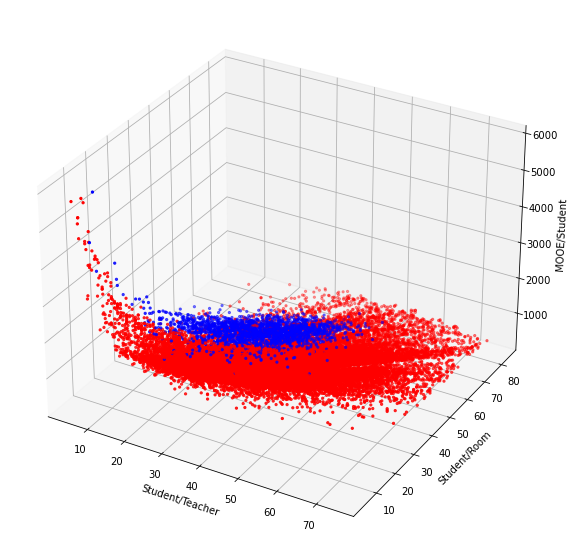

In [85]:
#create a 3d scatter plot for variables: student/teacher, student/room, MOOE/student ratio
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

teacher = school_merged5['teacher.student']
room = school_merged5['rooms.student']
budget = school_merged5['mooe.student']
ax.scatter(teacher, room, budget, s=5, c=school_merged5['school.classification'].map(colors))

ax.set_xlabel('Student/Teacher')
ax.set_ylabel('Student/Room')
ax.set_zlabel('MOOE/Student')

plt.show()

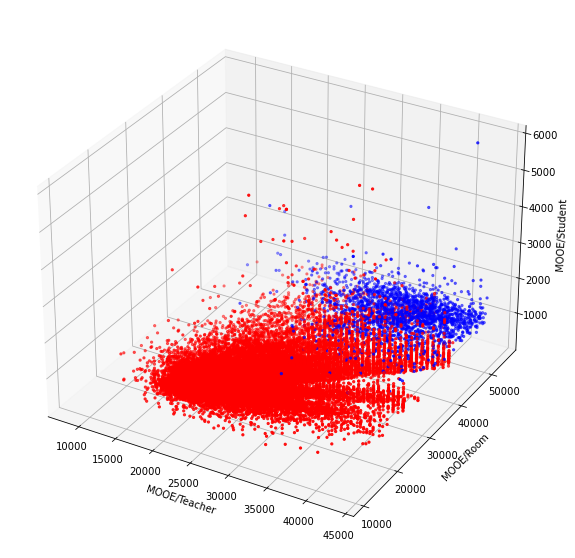

In [86]:
#create a 3d scatter plot for variables: MOOE/teacher, MOOE/room, MOOE/student ratio
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

teacher = school_merged5['teacher.mooe']
room = school_merged5['rooms.mooe']
budget = school_merged5['mooe.student']
ax.scatter(teacher, room, budget, s=5, c=school_merged5['school.classification'].map(colors))

ax.set_xlabel('MOOE/Teacher')
ax.set_ylabel('MOOE/Room')
ax.set_zlabel('MOOE/Student')

plt.show()

<Figure size 720x576 with 0 Axes>

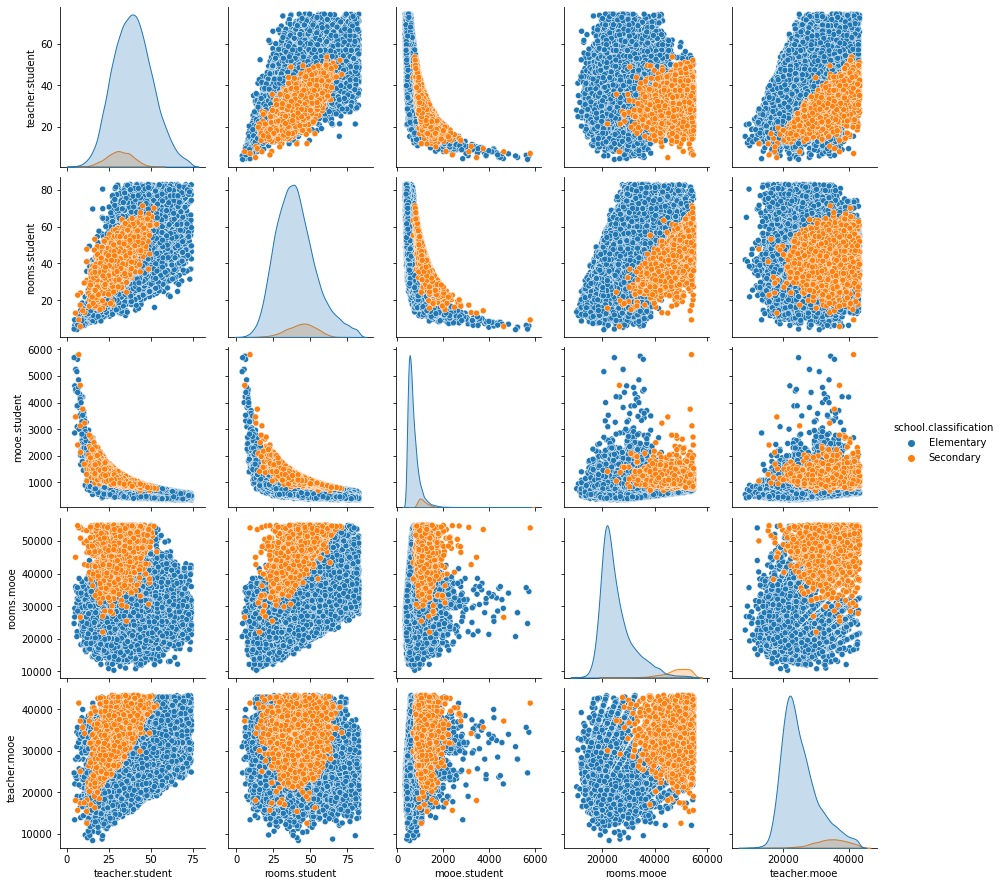

In [90]:
#pairwise scatter plot for the different variables
plt.figure(figsize=(10,8))

sns.pairplot(vars = ['teacher.student', 'rooms.student', 'mooe.student', 'rooms.mooe', 'teacher.mooe'], data = school_merged5, hue='school.classification')

plt.show()

## Visualization by province

In [ ]:
#create a version that is grouped by province
by_province = school_merged5.groupby['school.province','school.classification']['teacher.student', 'rooms.student', 'mooe.student', 'rooms.mooe', 'teacher.mooe'].median().reset_index()
by_province